In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
# Reading the file
df = pd.read_csv("HPLBibliographicRecordsOneGenreCleanedFull.csv", encoding ='ISO-8859-1')



In [2]:
#Reading the first five records
df.head()

,ï»¿Sl. No.,ISBN1,genre,oldDesc,title,Desc
0,27,'9780064440172,Publications,"The case of the cat's meow, Bonsall, Crosby, ...",The case of the cat's meow,"The case of the cat's meow, Bonsall, Crosby, -..."
1,30,'9780064440011,Publications,"A bargain for Frances, Hoban, Russell., Thelm...",A bargain for Frances,"A bargain for Frances, Hoban, Russell., Thelma..."
2,57,'9780064440349,Publications,"Owl at home, Lobel, Arnold., Relates five adv...",Owl at home,"Owl at home, Lobel, Arnold., Relates five adve..."
3,102,'9780064440325,Publications,"Arthur's pen pal, Hoban, Lillian., Arthur vie...",Arthur's pen pal,"Arthur's pen pal, Hoban, Lillian., Arthur view..."
4,161,'9780888940124,Guidebooks,Queen Charlotte Islands : a narrative of disco...,Queen Charlotte Islands : a narrative of disco...,Queen Charlotte Islands : a narrative of disco...


In [3]:

#Checking the shape of the file
df.shape

(106606, 6)

<AxesSubplot:>

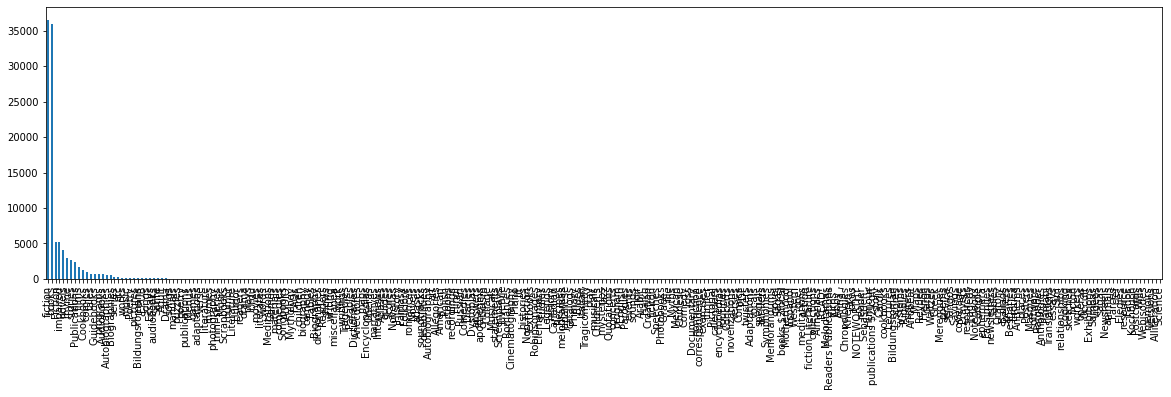

In [4]:
# Genre distribution
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (20,5)  )

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

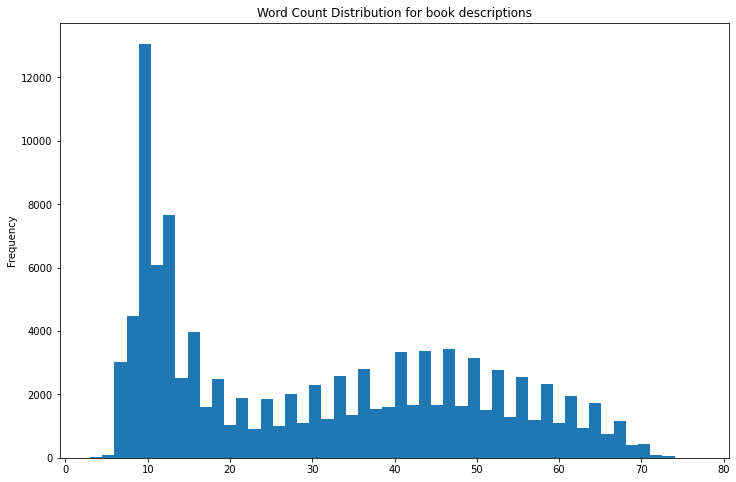

In [5]:
# Calculating the word count for book description
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

<AxesSubplot:title={'center':'Top 20 Part-of-speech tagging for comments'}>

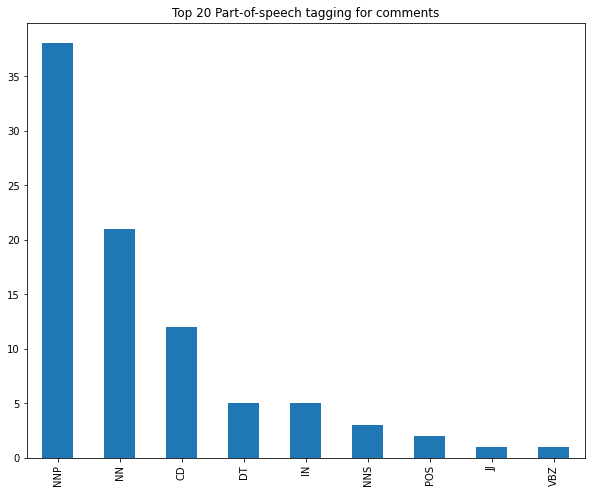

In [6]:
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

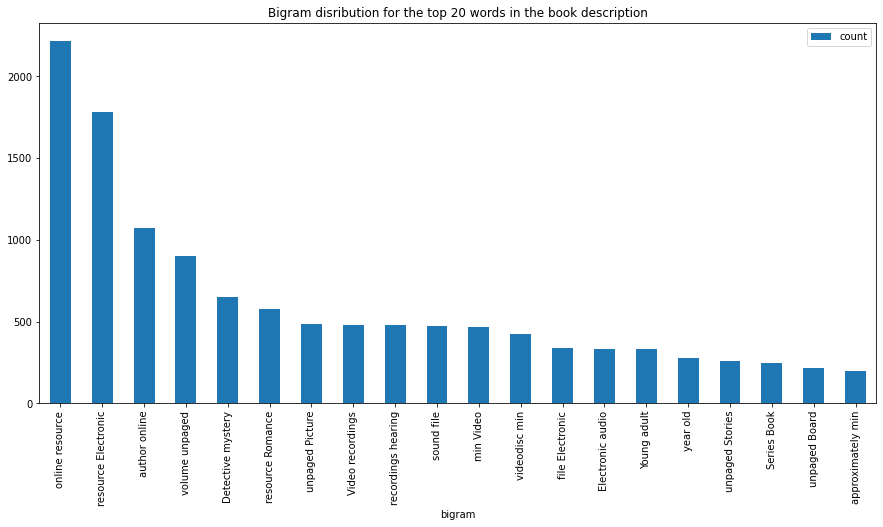

In [7]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

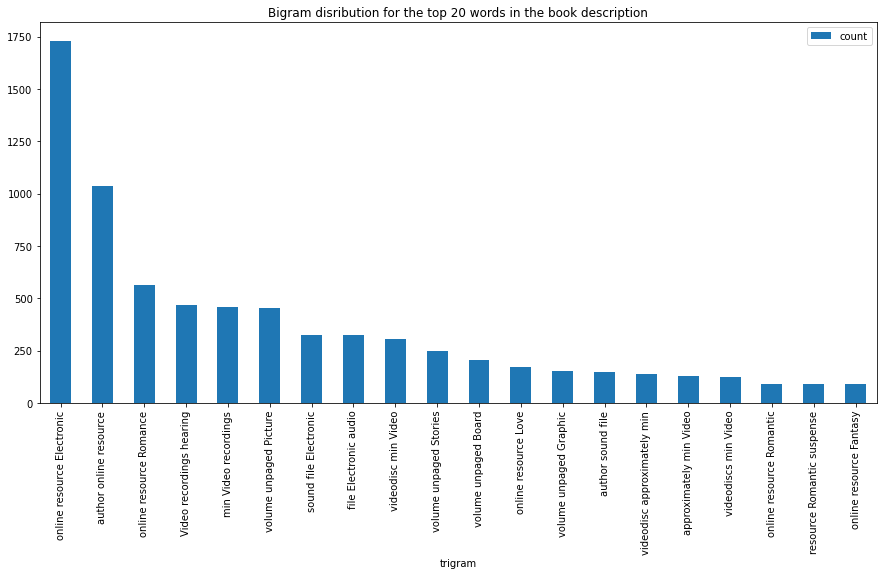

In [8]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [9]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Desc'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)


In [10]:
df.head()

,ï»¿Sl. No.,ISBN1,genre,oldDesc,title,Desc,word_count,cleaned_desc
0,27,'9780064440172,Publications,"The case of the cat's meow, Bonsall, Crosby, ...",The case of the cat's meow,"The case of the cat's meow, Bonsall, Crosby, -...",12,case cat s meow bonsall crosby readers
1,30,'9780064440011,Publications,"A bargain for Frances, Hoban, Russell., Thelm...",A bargain for Frances,"A bargain for Frances, Hoban, Russell., Thelma...",22,bargain frances hoban russell thelma usually o...
2,57,'9780064440349,Publications,"Owl at home, Lobel, Arnold., Relates five adv...",Owl at home,"Owl at home, Lobel, Arnold., Relates five adve...",12,owl home lobel arnold relates five adventures ...
3,102,'9780064440325,Publications,"Arthur's pen pal, Hoban, Lillian., Arthur vie...",Arthur's pen pal,"Arthur's pen pal, Hoban, Lillian., Arthur view...",25,arthur s pen pal hoban lillian arthur views li...
4,161,'9780888940124,Guidebooks,Queen Charlotte Islands : a narrative of disco...,Queen Charlotte Islands : a narrative of disco...,Queen Charlotte Islands : a narrative of disco...,20,queen charlotte islands narrative discovery ad...


In [11]:
# Function for recommending books based on Book title. It takes book title and genre as an input.def recommend(title, genre):
def cm_recommender(title, genre):    
    global rec
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title']].iloc[movie_indices]
    print(rec)


In [12]:
cm_recommender("Harry Potter and the sorcerer's stone", "audiobooks")

                                      title
56      Harry Potter and the goblet of fire
54  Harry Potter and the chamber of secrets
58       Alvin Ho collection. Books 3 and 4
55     Harry Potter and the Deathly Hallows
0                                    Monkey
